In [2]:
import sklearn
import sys
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plot
print( 'The scikit learn version is {}.'.format(sklearn.__version__))
df = pd.read_csv('HYB.csv')
data = df.dropna()
print (data.head())
print (data.tail())
print(data.describe())






The scikit learn version is 0.21.2.
       CUSIP  Ticker  Issue Date    Maturity 1st Call Date Moodys S_and_P  \
0  000324AA1  FLECIN    7/1/2014    7/1/2019    10/23/2017    Nan     Nan   
1  00080QAB1     RBS   3/15/2004    6/4/2018           Nan    Ba1     BB+   
2  00081TAD0    ACCO   5/14/2010   3/15/2015           Nan     WR      NR   
3  00081TAH1    ACCO   6/17/2013   4/30/2020           Nan     WR      NR   
4  00081TAJ7    ACCO  12/22/2016  12/15/2024    12/15/2019     B1     BB-   

  Fitch Bloomberg Composite Rating  Coupon  ...  percent_intra_dealer  \
0   Nan                        Nan   12.00  ...              0.006645   
1   BBB                        BB+    4.65  ...              0.425018   
2   BB+                         NR   10.63  ...              0.115207   
3    WD                         NR    6.75  ...              0.426332   
4    BB                        BB-    5.25  ...              0.157216   

  percent_uncapped bond_type  Client_Trade_Percentage weekly_m

In [3]:
xList = []
labels = []
for line in data:
    #split on comma
    row = data[line]
    xList.append(row)
sys.stdout.write("Number of Rows of Data = " + str(len(xList[1])) + '\n')
sys.stdout.write("Number of Columns of Data = " + str(len(xList)))

Number of Rows of Data = 2721
Number of Columns of Data = 37

In [4]:
xList = []
labels = []
for line in data:
    #split on comma
    row = data[line]
    xList.append(row)
nrow = len(xList[1])
ncol = len(xList)
type = [0]*3
colCounts = []
for col in xList:
    for row in range(nrow):
        try:
            a = float(col[row])
            if isinstance(a, float):
                type[0] += 1
        except ValueError:
            if len(col[row]) > 0:
                type[1] += 1
            else:
                type[2] += 1
    colCounts.append(type)
    type = [0]*3
    
sys.stdout.write("Col#" + '\t' + "Number" + '\t' +
                 "Strings" + '\t ' + "Other\n")
iCol = 0
for types in colCounts:
    sys.stdout.write(str(iCol) + '\t' + str(types[0]) + '\t' +
                     str(types[1]) + '\t' + str(types[2]) + "\n")
    iCol += 1


Col#	Number	Strings	 Other
0	0	2721	0
1	0	2721	0
2	0	2721	0
3	0	2721	0
4	1757	964	0
5	161	2560	0
6	186	2535	0
7	1170	1551	0
8	41	2680	0
9	2721	0	0
10	2721	0	0
11	0	2721	0
12	0	2721	0
13	2721	0	0
14	0	2721	0
15	2721	0	0
16	2721	0	0
17	2721	0	0
18	2721	0	0
19	0	2721	0
20	2721	0	0
21	2721	0	0
22	2721	0	0
23	2721	0	0
24	2721	0	0
25	2721	0	0
26	2721	0	0
27	2721	0	0
28	2721	0	0
29	2721	0	0
30	2721	0	0
31	2721	0	0
32	2721	0	0
33	2721	0	0
34	2721	0	0
35	2721	0	0
36	2721	0	0


In [5]:
data = pd.read_csv('HYB.csv')
data.drop(data.iloc[:, 0:9], inplace = True, axis = 1)
data.drop(data.iloc[:, 2:4], inplace = True, axis = 1)
data.drop(data.iloc[:, 3:4], inplace = True, axis = 1)
data.drop(data.iloc[:, 4:7], inplace = True, axis = 1)
data = data.applymap(lambda x: 1 if x == 'Yes' else x)
data = data.applymap(lambda x: 0 if x == 'No' else x)
#dropping all the strings and keep IN_ETF with int representation
data.dropna()
print (data.head())
print (data.shape)
           

   Coupon  Issued Amount  Maturity At Issue months  LiquidityScore  IN_ETF  \
0   12.00    405000000.0                     60.87       10.891365       0   
1    4.65    499285000.0                    173.13       24.625486       1   
2   10.63    460000000.0                     58.87       12.841557       0   
3    6.75    500000000.0                     83.63       26.226355       1   
4    5.25    400000000.0                     97.17       14.138395       0   

   LIQ SCORE  n_trades  volume_trades  total_median_size  total_mean_size  \
0   0.108914       301   2.640038e+08          1000000.0      877088.9535   
1   0.246255      2854   2.668630e+08            24000.0       93504.9054   
2   0.128416       434   2.814210e+08           875000.0      648435.4839   
3   0.262264      4975   1.163167e+09            26000.0      233802.4121   
4   0.141384       388   2.493420e+08           750000.0      642634.0206   

   ...  percent_intra_dealer  percent_uncapped  bond_type  \
0  ... 

In [6]:
xList = []
labels = []
for line in data:
    #split on comma
    row = data[line]
    xList.append(row)
nrow = len(xList[1])
ncol = len(xList)
type = [0]*3
colCounts = []
#generate summary statistics for column 3, Maturity At Issue months
col = 2
colData = [xList[col]]
colArray = np.array(colData)
colMean = np.mean(colArray)
colsd = np.std(colArray)
sys.stdout.write("Mean = " + '\t' + str(colMean) + '\t\t' +
            "Standard Deviation = " + '\t ' + str(colsd) + "\n")
#calculate quantile boundaries
ntiles = 4
percentBdry = []
for i in range(ntiles+1):
    percentBdry.append(np.percentile(colArray, i*(100)/ntiles))
sys.stdout.write("\nBoundaries for 4 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write(" \n")
#run again with 10 equal intervals
ntiles = 10
percentBdry = []
for i in range(ntiles+1):
    percentBdry.append(np.percentile(colArray, i*(100)/ntiles))
sys.stdout.write("Boundaries for 10 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write(" \n")
#The 5th column contains categorical variables
col = 4
colData = xList[4]
unique = set(colData)
sys.stdout.write("Unique Label Values \n")
print(unique)
#count up the number of elements having each value
catDict = dict(zip(list(unique),range(len(unique))))
catCount = [0]*2
for elt in colData:
    catCount[catDict[elt]] += 1
sys.stdout.write("\nCounts for Each Value of Categorical Label \n")
print(list(unique))
print(catCount)


Mean = 	113.96899669239251		Standard Deviation = 	 101.87445117672164

Boundaries for 4 Equal Percentiles 
[11.93, 65.17, 97.37, 121.77, 1217.57]
 
Boundaries for 10 Equal Percentiles 
[11.93, 59.83, 61.0, 80.2, 87.0, 97.37, 105.2, 121.7, 121.87, 127.43, 1217.57]
 
Unique Label Values 
{0, 1}

Counts for Each Value of Categorical Label 
[0, 1]
[1408, 1313]


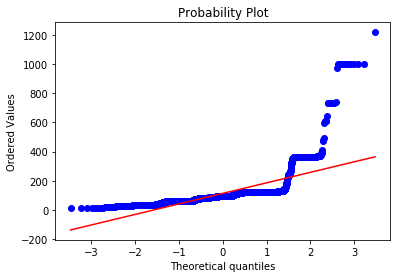

In [7]:
import scipy
import pylab
xList = []
labels = []
for line in data:
    #split on comma
    row = data[line]
    xList.append(row)
nrow = len(xList[1])
ncol = len(xList)
type = [0]*3
colCounts = []
#generate summary statistics for column 3 (e.g.)
col = 2
colData = []
for row in xList[2]:
    colData.append(float(row))
scipy.stats.probplot(colData, dist="norm", plot=pylab)
pylab.show()

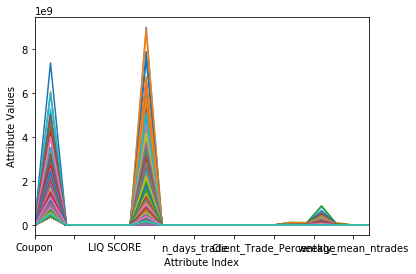

In [10]:
for i in range(2720):

    dataRow = data.iloc[i,0:22]
    dataRow.plot()
plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

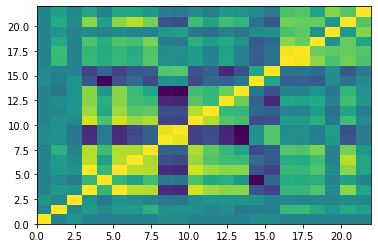

In [11]:
from pandas import DataFrame
corMat = DataFrame(data.corr())
#visualize correlations using heatmap
plot.pcolor(corMat)
plot.show()

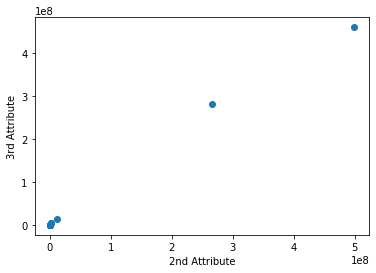

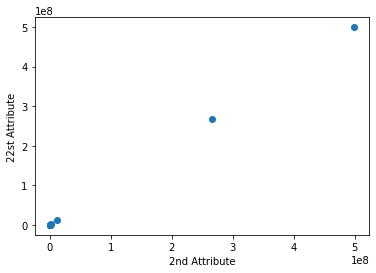

In [12]:
dataRow2 = data.iloc[1,0:22]
dataRow3 = data.iloc[2,0:22]
plot.scatter(dataRow2, dataRow3)
plot.xlabel("2nd Attribute")
plot.ylabel(("3rd Attribute"))
plot.show()
dataRow21 = data.iloc[1,0:22]
plot.scatter(dataRow2, dataRow21)
plot.xlabel("2nd Attribute")
plot.ylabel(("22st Attribute"))
plot.show()

In [13]:
dataRow2 = data.iloc[10,0:22]
dataRow3 = data.iloc[12,0:22]
dataRow21 = data.iloc[20,0:22]
mean2 = 0.0; mean3 = 0.0; mean21 = 0.0
numElt = len(dataRow2)
for i in range(numElt):
    mean2 += dataRow2[i]/numElt
    mean3 += dataRow3[i]/numElt
    mean21 += dataRow21[i]/numElt
var2 = 0.0; var3 = 0.0; var21 = 0.0
for i in range(numElt):
    var2 += (dataRow2[i] - mean2) * (dataRow2[i] - mean2)/numElt
    var3 += (dataRow3[i] - mean3) * (dataRow3[i] - mean3)/numElt
    var21 += (dataRow21[i] - mean21) * (dataRow21[i] - mean21)/numElt
corr23 = 0.0; corr221 = 0.0
for i in range(numElt):
    corr23 += (dataRow2[i] - mean2) * \
              (dataRow3[i] - mean3) / (np.sqrt(var2*var3) * numElt)
    corr221 += (dataRow2[i] - mean2) * \
               (dataRow21[i] - mean21) / (np.sqrt(var2*var21) * numElt)
sys.stdout.write("Correlation between attribute 10 and 12 \n")
print(corr23)
sys.stdout.write(" \n")
sys.stdout.write("Correlation between attribute 12 and 22 \n")
print(corr221)
sys.stdout.write(" \n")


Correlation between attribute 10 and 12 
0.9630036608966975
 
Correlation between attribute 12 and 22 
0.9998576932667128
 


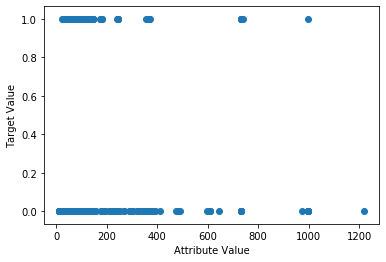

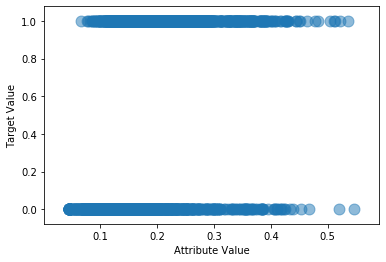

In [14]:
dataRow = data.iloc[0:2722,2]
target = data['IN_ETF']
plot.scatter(dataRow, target)
plot.xlabel("Attribute Value")
plot.ylabel("Target Value")
plot.show()
#
#To improve the visualization, this version dithers the points a little
# and makes them somewhat transparent
dataRow = data.iloc[0:2722,5]
plot.scatter(dataRow, target, alpha=0.5, s=120)
plot.xlabel("Attribute Value")
plot.ylabel("Target Value")
plot.show()